# 01 - Data Exploration for Olive Leaf Disease Detection

This notebook explores the olive leaf image dataset to understand its structure, class distribution, image quality, and prepare for training the classification model.

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import pandas as pd
import random

base_path = "/Users/halakhalifa/Desktop/Advanced ML/olive-disease-detector/data"
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
classes = ["healthy", "peacock_spot", "aculus_olearius"]

## 1. Dataset Directory and Class Distribution

We will scan the training and test folders, count images per class, and visualize the class distribution to detect any imbalance.

In [2]:
def count_images(data_split):
    split_path = os.path.join(base_path, data_split)
    class_counts = {}
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        if os.path.isdir(class_dir):
            num_images = len([
                f for f in os.listdir(class_dir)
                if os.path.isfile(os.path.join(class_dir, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            class_counts[class_name] = num_images
    return class_counts

train_counts = count_images('train')
test_counts = count_images('test')

print("Train Set Image Counts:")
print(train_counts)

print("\nTest Set Image Counts:")
print(test_counts)

Train Set Image Counts:
{'healthy': 830, 'peacock_spot': 700, 'aculus_olearius': 690}

Test Set Image Counts:
{'healthy': 220, 'peacock_spot': 260, 'aculus_olearius': 200}


/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_79806/675344505.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(train_counts.keys(), rotation=45)
/var/folders/jv/c9vh4bnj087cpqc52674mcsh0000gn/T/ipykernel_79806/675344505.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(test_counts.keys(), rotation=45)


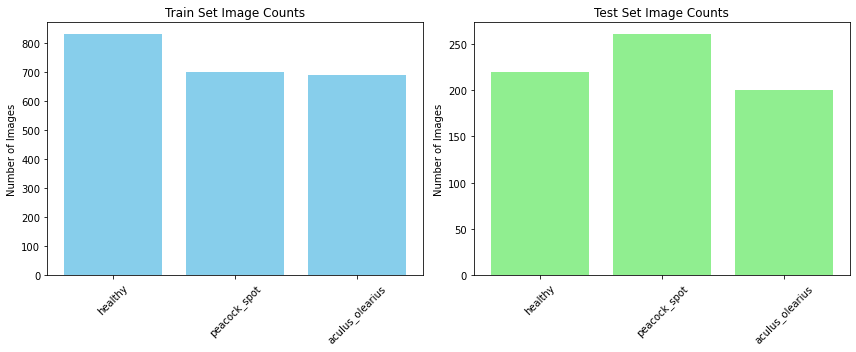

In [3]:
# Plot class distribution bar charts
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(train_counts.keys(), train_counts.values(), color='skyblue')
axs[0].set_title("Train Set Image Counts")
axs[0].set_ylabel("Number of Images")
axs[0].set_xticklabels(train_counts.keys(), rotation=45)

axs[1].bar(test_counts.keys(), test_counts.values(), color='lightgreen')
axs[1].set_title("Test Set Image Counts")
axs[1].set_ylabel("Number of Images")
axs[1].set_xticklabels(test_counts.keys(), rotation=45)

plt.tight_layout()
plt.show()

## 2. Sample Images from Each Class

Displaying representative images from each class helps us visually confirm data quality and variability.

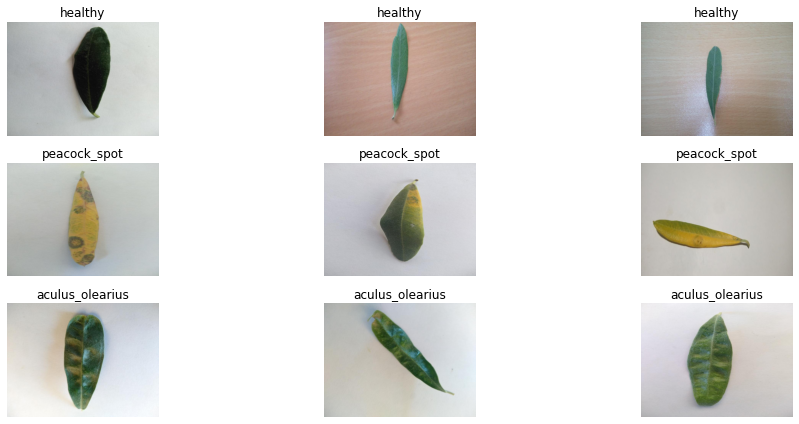

In [4]:
plt.figure(figsize=(15, 6))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_path, class_name)
    images = random.sample(os.listdir(class_dir), 3)
    
    for j, img_name in enumerate(images):
        img_path = os.path.join(class_dir, img_name)
        img = mpimg.imread(img_path)
        
        plt.subplot(len(classes), 3, i*3 + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{class_name}")

plt.tight_layout()
plt.show()

## 3. Image Shape, Size, and Color Channel Consistency

We verify image dimensions and channels to ensure input consistency for the CNN model.

In [5]:
image_shapes = []
modes_found = set()

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)
    sample_images = random.sample(os.listdir(class_dir), 5)
    
    for img_name in sample_images:
        img_path = os.path.join(class_dir, img_name)
        with Image.open(img_path) as img:
            img_array = np.array(img)
            print(f"{class_name}/{img_name} -> shape: {img_array.shape}, mode: {img.mode}")
            image_shapes.append(img_array.shape)
            modes_found.add(img.mode)

print("\nUnique image shapes found:", set(image_shapes))
print("Unique image modes found:", modes_found)

healthy/B-36.JPG -> shape: (600, 800, 3), mode: RGB
healthy/B-266.JPG -> shape: (600, 800, 3), mode: RGB
healthy/B-557.jpg -> shape: (600, 800, 3), mode: RGB
healthy/IMG_20190807_143812.jpg -> shape: (600, 800, 3), mode: RGB
healthy/B-531.JPG -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190806_170542.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/A568.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190806_165352.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190806_173425.jpg -> shape: (600, 800, 3), mode: RGB
peacock_spot/IMG_20190729_172524.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/417.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/329.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/522.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/568.jpg -> shape: (600, 800, 3), mode: RGB
aculus_olearius/122.jpg -> shape: (600, 800, 3), mode: RGB

Unique image shapes found: {(600, 800, 3)}
Unique image modes found: {'RGB'}


## 4. Class Imbalance Metrics

We calculate the proportion of each class in train and test sets to inform potential class weighting or augmentation strategies.

In [6]:
# Class distribution ratios for train and test sets
train_total = sum(train_counts.values())
test_total = sum(test_counts.values())

train_ratios = {cls: count/train_total for cls, count in train_counts.items()}
test_ratios = {cls: count/test_total for cls, count in test_counts.items()}

print("\nTrain Set Class Ratios:")
for cls, ratio in train_ratios.items():
    print(f"{cls}: {ratio:.3f}")

print("\nTest Set Class Ratios:")
for cls, ratio in test_ratios.items():
    print(f"{cls}: {ratio:.3f}")


Train Set Class Ratios:
healthy: 0.374
peacock_spot: 0.315
aculus_olearius: 0.311

Test Set Class Ratios:
healthy: 0.324
peacock_spot: 0.382
aculus_olearius: 0.294


## 5. Channel Mode Consistency Check

We verify all images are in RGB mode, discarding or flagging any grayscale or corrupted images.

In [7]:
non_rgb_images = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        with Image.open(img_path) as img:
            if img.mode != "RGB":
                non_rgb_images.append((class_name, img_name, img.mode))

print("Non-RGB images found:", non_rgb_images)

Non-RGB images found: []


## 6. Brightness Statistics

Compute average brightness to detect images with poor lighting, which may require preprocessing.

In [8]:
import cv2

brightness_values = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)
    sample_images = random.sample(os.listdir(class_dir), 10)
    
    for img_name in sample_images:
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            brightness_values.append(hsv[..., 2].mean())

print(f"Average brightness of sampled images: {np.mean(brightness_values):.2f}")

Average brightness of sampled images: 188.23


## 7. Summary Table of Dataset Statistics

A concise tabular overview to summarize class distributions and ratios.

In [9]:
summary_df = pd.DataFrame({
    "Train Count": [train_counts.get(cls, 0) for cls in classes],
    "Test Count": [test_counts.get(cls, 0) for cls in classes]
}, index=classes)

summary_df["Total"] = summary_df["Train Count"] + summary_df["Test Count"]
summary_df["Train %"] = summary_df["Train Count"] / train_total
summary_df["Test %"] = summary_df["Test Count"] / test_total

summary_df

,Train Count,Test Count,Total,Train %,Test %
healthy,830,220,1050,0.373874,0.323529
peacock_spot,700,260,960,0.315315,0.382353
aculus_olearius,690,200,890,0.310811,0.294118
